# IMDB Movie Recommendation

### This capstone project aims to build a product recommendation system in a model-based collaborative filtering approach using different machine learning models and comparing the results between them.

# Business Understanding

### By the start of 2020, the amount of data available on the internet was estimated to be 44 zettabytes of data. With this huge of a database and more than 4.8 billion users on the internet, accurate and relevant search and recommendation of products is an ever increasing need to keep user engagement and bring the best results in accordance to the factors which are important to the user. This can vary with demographics, psychographics, search habits, and other such variables.

### This is especially relevant to large tech companies like Amazon, Netflix, Alibaba and other online platforms which offer a wide variety of products to the audience. They need personalized results to the individual user or more commonly called a recommendation system which filters and displays other products that the user may be interested in to increase basket ratio in the case of Amazon and Alibaba or increase viewing times in the case of Netflix.

# To-Do
## 1. Change font of genres in tree diagram
## 2. Get percentages of ratings (bar graph displaying the count of ratings from 0 - 10)

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, get_single_color_func
import squarify
from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import warnings
warnings.filterwarnings("ignore")  #To ignore all warnings about package updates and caveats
sns.set_theme()

#Dictionary to be used for plotting
plots = {
    'fonttitle' : {'fontsize':20},
    'fontlabel' : {'fontsize':15},
    'figuresize' : (20,10),
    'colorgold' : 'gold',
    'coloryellow' : 'yellow'
}

ModuleNotFoundError: No module named 'wordcloud'

# Data Understanding - **NEED TO UPDATE**

This dataset is the courtesy of Stefano Leone who scrapped the publically available website https://www.imdb.com for all movies containing more than 100 votes as of 01/01/2020. Link to dataset (https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)

The complete data is split into 4 different files.

IMDB movies ------------> Contains a wide variety of information about the movie itself

IMDB names -------------> Contains the names of the actors, directors, screenwriter, etc who were a part of the making of the movie

IMDB ratings -----------> Contains rating information for each movie


In [2]:
movies = pd.read_csv('../Data/IMDB movies.csv')
movies['imdb_title_id'] = movies['imdb_title_id'].str[2:]  # Removing tt from the beginning of the title ids
names = pd.read_csv('../Data/IMDB names.csv')
ratings = pd.read_csv('../Data/IMDB ratings.csv')
ratings = ratings[['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote','us_voters_rating','us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes']]
ratings['imdb_title_id'] = ratings['imdb_title_id'].str[2:]  # Removing tt from the beginning of the title ids

### IMDb Movies

This contains extensive information of the movie itself. The data dictionary explains all the attributes of the data more clearly.

In [3]:
col_names_movies = movies.columns
desc_movies = ['Unique identifier of the title of the movie','Descriptive title of the movie','The original title of the movie before it changed (if at all)','Year of release','Date published','Genre',
'Time duration of the movie in minutes','Countries the movie was shot in','Main language spoken in the movie','Director of the movie','Screen play writer','Production company','List of all actors involved',
'Brief description of the movie','Average weighted rating','Number of votes','Total budget','Gross income generated by the movie in the United States',
'Gross income generated worldwide not including US','Meta score','Number of written reviews by users','Number of written reviews by critics']
dict_movies = {
    'Column Name' : col_names_movies,
    'Description' : desc_movies
}

idx = range(0,len(col_names_movies))

dict_movies = pd.DataFrame(dict_movies, index=idx)
dict_movies

,Column Name,Description
0,imdb_title_id,Unique identifier of the title of the movie
1,title,Descriptive title of the movie
2,original_title,The original title of the movie before it chan...
3,year,Year of release
4,date_published,Date published
5,genre,Genre
6,duration,Time duration of the movie in minutes
7,country,Countries the movie was shot in
8,language,Main language spoken in the movie
9,director,Director of the movie


## Exploring the Features of the Dataset

In [4]:
print('Rows     :',movies.shape[0])
print('Columns  :',movies.shape[1])
print('\nMissing values    :',movies.isnull().values.sum())
#print('\nUnique values :\n',movies.nunique())
print('\nPercentage of missing values in columns:\n',movies.isnull().sum()/movies.shape[0]*100)
print('\nDuplicated rows: \n',movies.duplicated().value_counts())
print('\nData Types of each column: \n', movies.dtypes)

Rows     : 85855
Columns  : 22

Missing values    : 288652

Percentage of missing values in columns:
 imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.074544
language                  0.970241
director                  0.101334
writer                    1.830994
production_company        5.188981
actors                    0.080368
description               2.463456
avg_vote                  0.000000
votes                     0.000000
budget                   72.383670
usa_gross_income         82.148972
worlwide_gross_income    63.873974
metascore                84.502941
reviews_from_users        8.848640
reviews_from_critics     13.740609
dtype: float64

Duplicated rows: 
 False    85855
dtype: int64

Data Types of each column: 
 imdb_title_id             object
ti

There isn't any need for columns which are mostly empty. Therefore, we will drop all rows which are more than 8% empty.

In [5]:
len(movies['imdb_title_id'])

85855

In [6]:
#Dropping columns with mostly missing data
movies.drop(['budget','usa_gross_income','worlwide_gross_income','metascore',
             'reviews_from_users','reviews_from_critics'], axis=1, inplace=True)

# Visualizations Related to Genre

## Most Popular Genres

The dataset contains a field for the genres related to the specified movie

There are 1343616 words in the combination of all cells in column genre


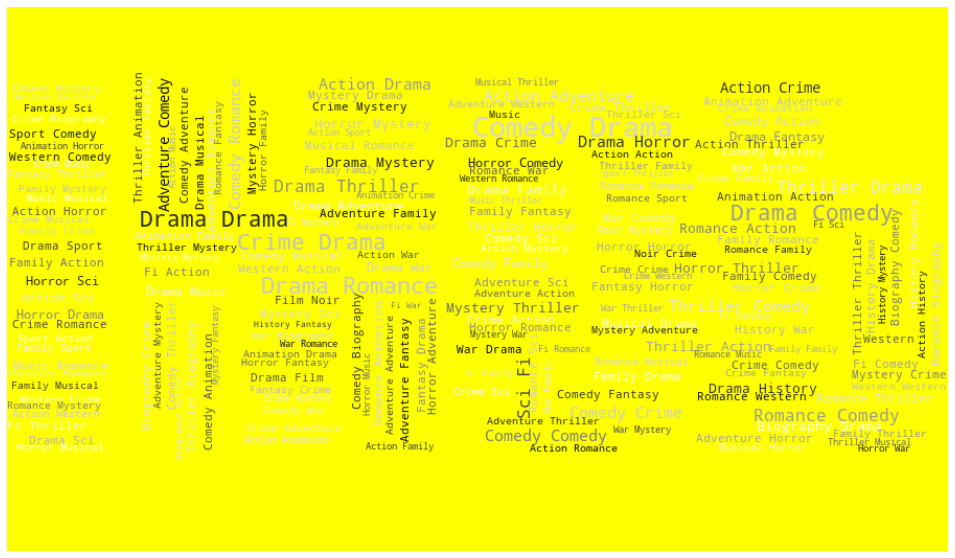

In [7]:
genres = movies['genre']
text = " ".join(genre for genre in genres)
print("There are {} words in the combination of all cells in column genre".format(len(text)))

weave_mask = np.array(Image.open("../Data/IMDB Logo.jpg"))
wordcloud = WordCloud(width=5000, height=5000, margin=0, colormap='Greys', background_color='#FFFF00', mask=weave_mask).generate(text)


#Plotting wordcloud
plt.figure(figsize=plots['figuresize'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("../Images/Figure 1.jpg")
plt.show()


The wordcloud represents a high level overview of the different genres present and a rough idea of how frequent a genre really appeared. The IMDb logo was used as a mask to obtain a wordcloud wrapped in the shape of the logo itself.

Although we get a good look at the different genres present, it does not give us a quantitative measure of the popularity of the different genres. This can be represented by the tree graph below. Comedy, Drama, and Romance seem to be the top 3 genres associated with the movies available on IMDb with drama taking the reigns.

In [8]:
def get_count(df,col):

    #This function takes in a dataframe and transformes a column with multiple data in it to return the count

    genere = df[col].value_counts()
    genr = {}

    for idx, val in genere.items():
        l = idx.split(',')

        for i in l:
            i = i.strip()
            
            if i in genr.keys():
                d={}
                d[i] = val + genr[i]
                genr.update(d)

            else:
                d = {i:val}
                genr.update(d)

        theme, count = [],[]

    for idx, val in genr.items():
        theme.append(idx)
        count.append(val)

    result = pd.DataFrame({col:theme, 'count':count}).sort_values('count', ascending=False)
    result.reset_index(drop=True, inplace=True)

    return result



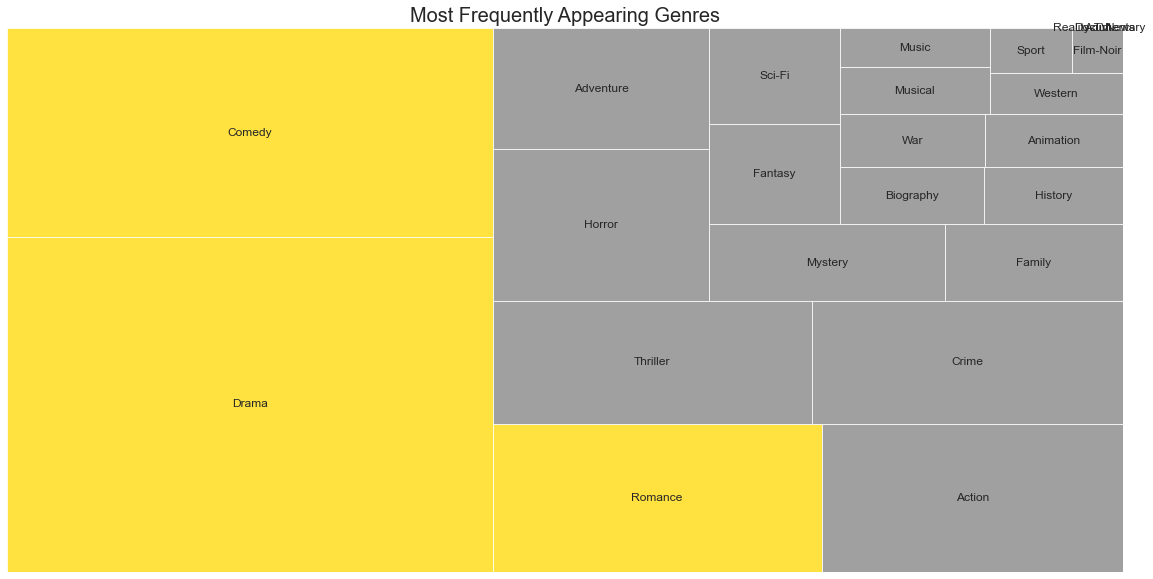

In [9]:
count_of_genre = get_count(movies,'genre')
count_of_genre['color'] = 'grey'
count_of_genre['color'].iloc[:3] = 'gold'
plt.figure(figsize=(plots['figuresize']))
squarify.plot(sizes = count_of_genre['count'], label=count_of_genre['genre'], color=count_of_genre['color'], alpha=0.75)
plt.axis('off')
plt.title('Most Frequently Appearing Genres', fontdict=plots['fonttitle']);
plt.savefig("../Images/Figure 2.jpg")

## RUNNING TIMES FOR EACH GENRE

It would be interesting to see what the running times of these genres look like.

The below figure represents the average running times of each genre. It looks like History and Biograpgy have the longest running times while Drama, our top result for the popularity of genres in the figure before, comes 7th in this list.

In [10]:
def get_addition_of_two_columns(df,col1,col2):

    # This function takes in a dataframe and the 2 columns in question. It splits the first column up to it's
    # individual components and adds the sum of the second column to each unique value of column 1

    df = df[[col1,col2]].reset_index(drop=True)
    dict_df = {}
    dict_count = {}
    
    for i in range (0,len(df)):
        l = df[col1].iloc[i].split(',')

        for j in l:
            j = j.strip()

            if j in dict_df.keys():
                d = {}
                d[j] = df[col2][i] + dict_df[j]
                dict_df.update(d)
            else:
                d = {j:df[col2].iloc[i]}
                dict_df.update(d)
    
    col1_list, col2_list = [],[]
    for idx, val in dict_df.items():
        col1_list.append(idx)
        col2_list.append(val)

    result = pd.DataFrame({col1:col1_list,col2:col2_list})
    return result

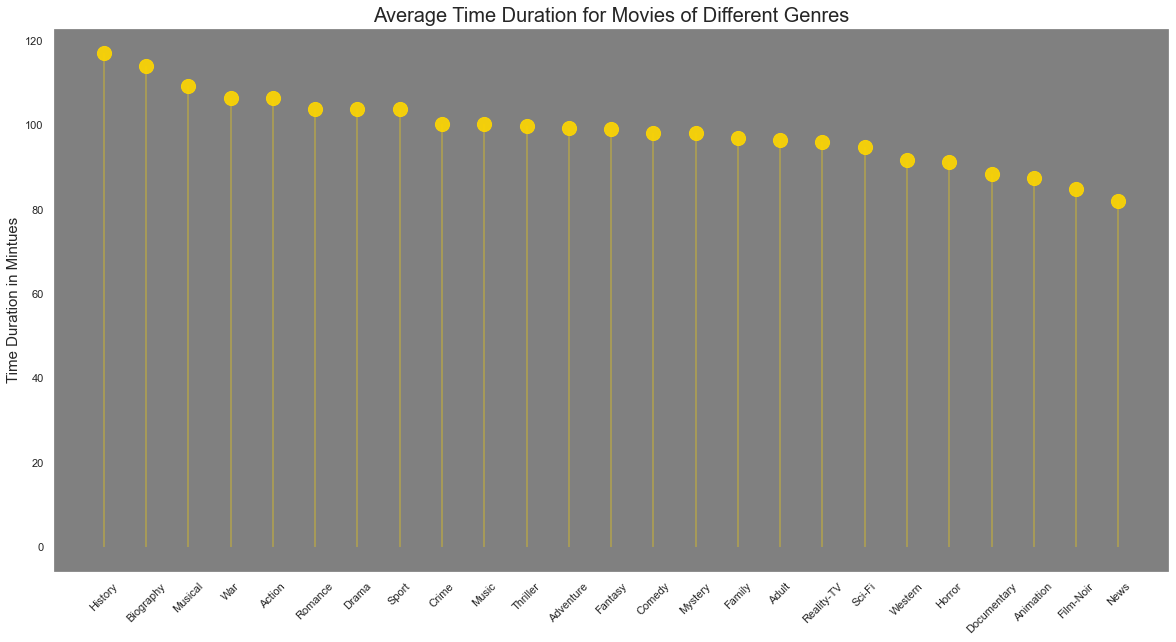

In [11]:
# Getting total duration of genres
dur_by_genre = get_addition_of_two_columns(movies,'genre','duration')
dur_by_genre = dur_by_genre.merge(count_of_genre, on='genre')
dur_by_genre['Avg Duration'] = dur_by_genre['duration']/dur_by_genre['count']
dur_by_genre.reset_index(drop=True, inplace=True)
dur_by_genre.sort_values('Avg Duration', ascending=False, inplace=True)
my_range = range(1, len(dur_by_genre.index)+1)

# Plotting figures
fig = plt.figure(figsize=plots['figuresize'], facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.vlines(ymin=0, ymax=dur_by_genre['Avg Duration'], x=my_range, color='gold', alpha = 0.4)
ax.scatter(my_range, dur_by_genre['Avg Duration'], s=200, color='gold', alpha=0.9)
ax.set_facecolor('grey')
ax.grid(False)
ax.set_xticks(my_range)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticklabels(dur_by_genre['genre'], rotation=45)
ax.set_title('Average Time Duration for Movies of Different Genres', fontdict=plots['fonttitle'])
ax.set_ylabel('Time Duration in Mintues', fontdict=plots['fontlabel']);
fig.savefig("../Images/Figure 3.jpg")


So it seems like the popularity of genres does not directly correlate with the running times of movies. In fact, History, Biography, and Musical which have the longest running times are the least popular genres we see in the IMDb dataset. And those with the east running times, Documentary, Animation, Film-Noir, and News are also not as popular as other genres.

A fair conclusion can be made that popular genres are at neither extremes of running times, but somewhere in between the extremes. Anywhere between 90 to 110 mins on average is the range where most popular genres seem to place themselves.

A question arises here as to which genres were rated the most and what was their average rating. This can give some insight to how well liked these movies were.

### Find the Distribution of Ratings per Genre

In [12]:
def get_votes_per_genre(df):
    
    list_genre = []
    list_vote = []
    
    for i in range(0,len(df)):
        genre = df['genre'].iloc[i].split(',')
    
        for genr in genre:
            genr = genr.strip()
            list_genre.append(genr)
            vote = df['avg_vote'].iloc[i]
            list_vote.append(vote)
    
    result = pd.DataFrame({'genre':list_genre,'avg_vote':list_vote})
    return result
    

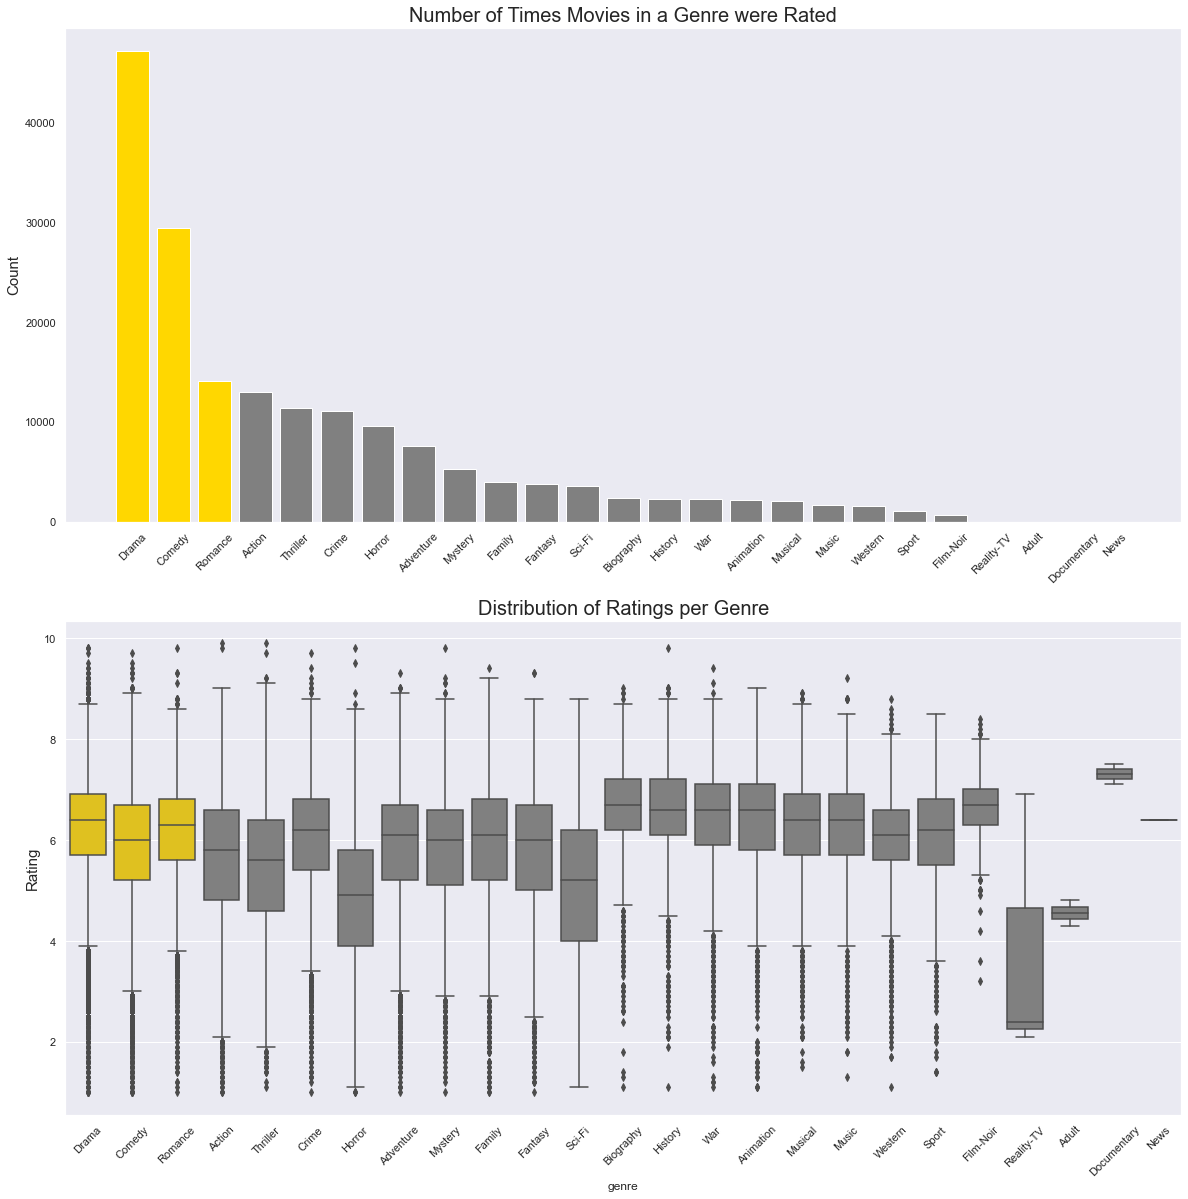

In [13]:
# Using function to get appropriate data
votes_per_genre = get_votes_per_genre(movies)

# Assigning colors to the same genres in count_of_genre dataset
most_freq_genres = count_of_genre['genre'].iloc[:3]

my_palette = {
    count_of_genre['genre'][0] : 'y',
    count_of_genre['genre'][1] : 'y',
    count_of_genre['genre'][2] : 'y'
}

my_palette = {}
x = 0

for i in count_of_genre['genre']:
    
    if x<3:
        my_palette[i] = 'gold'
        
    else:
        my_palette[i] = 'grey'
    
    x = x+1


# Merge votes_per_genre and count_of_genre to get count column for sorting
votes_per_genre = votes_per_genre.merge(count_of_genre[['genre','count']], on='genre')
votes_per_genre.sort_values('count', ascending=False, inplace=True)

# Plot for number of times genre was rated
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(2,1,1)
ax1.bar('genre','count', data=count_of_genre, color='color')
ax1.set_title('Number of Times Movies in a Genre were Rated', fontdict=plots['fonttitle'])
ax1.set_ylabel('Count', fontdict=plots['fontlabel'])
ax1.set_xticklabels(count_of_genre['genre'], rotation=45)
ax1.grid(False)

ax2 = plt.subplot(2,1,2)
ax2 = sns.boxplot( x='genre', y='avg_vote', data=votes_per_genre, palette=my_palette)
ax2.set_title('Distribution of Ratings per Genre', fontdict=plots['fonttitle'])
ax2.set_ylabel('Rating', fontdict=plots['fontlabel'])
ax2.set_xticklabels(count_of_genre['genre'], rotation=45);
fig.savefig("../Images/Figure 4.jpg")

We see some interesting things here. It makes sense for Drama, Action, and Comedy to be some of the most frequently rated genre as they are some of the most widely available ones too. But we can see that although they differ wildly in the number of times they were voted, the distribution of the actual ratings are nearly identical and not as varied.

The most variation we see is for the last few which are Reality-TV, Documentary, Adult, and News. This insight would make sense since they also have the least number of rating and therefore greater variation can occur here.

We'll now introduce the ratings dataset which contains different information on the ratings themselves and different breakdowns of it.

In [14]:
#Ratings Dictionary
col_names_ratings = ratings.columns
desc_ratings = ['Unique identifier of the title of the movie','IMDbs calculation of their weighted average vote','Total votes received','Mean of votes','Median of votes','Rating received by US voters',
'Number of votes received by US voters','Rating received by non-US voters','Number of votes received by non-US voters']

dict_ratings = {
    'Column Names' : col_names_ratings,
    'Description' : desc_ratings
}

idx = range(0,len(col_names_ratings))
dict_ratings = pd.DataFrame(dict_ratings, index=idx)
dict_ratings

,Column Names,Description
0,imdb_title_id,Unique identifier of the title of the movie
1,weighted_average_vote,IMDbs calculation of their weighted average vote
2,total_votes,Total votes received
3,mean_vote,Mean of votes
4,median_vote,Median of votes
5,us_voters_rating,Rating received by US voters
6,us_voters_votes,Number of votes received by US voters
7,non_us_voters_rating,Rating received by non-US voters
8,non_us_voters_votes,Number of votes received by non-US voters


## Percentage of Ratings Available

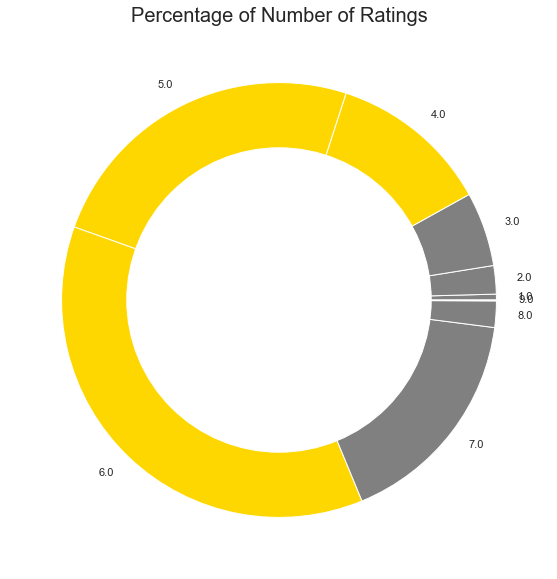

In [15]:
# Bin ratings
ratings['bin'] = ratings['weighted_average_vote'].apply(np.floor)
rat_grp = ratings.groupby('bin').count()['weighted_average_vote'].reset_index(name='Count')
rat_grp['color'] = 'grey'
rat_grp['color'].iloc[3:6] = 'gold'

# Make donut plot
plt.figure(figsize=plots['figuresize'])
plt.pie(rat_grp['Count'],labels=rat_grp['bin'],colors=rat_grp['color'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of Number of Ratings', fontdict=plots['fonttitle'])
plt.savefig("../Images/Figure 5.jpg")

In [16]:
ratings.dtypes

imdb_title_id             object
weighted_average_vote    float64
total_votes                int64
mean_vote                float64
median_vote              float64
us_voters_rating         float64
us_voters_votes          float64
non_us_voters_rating     float64
non_us_voters_votes      float64
bin                      float64
dtype: object

## Number of movies released throughout the years

In [17]:
# Correcting the year for title id tt8206668 from TV Movie 2019 to 2019
loc = movies[movies['year'] == 'TV Movie 2019'].index
movies.drop(loc, axis=0, inplace=True)

#Changing dtype of year to int
movies['year'] = movies['year'].astype(int)

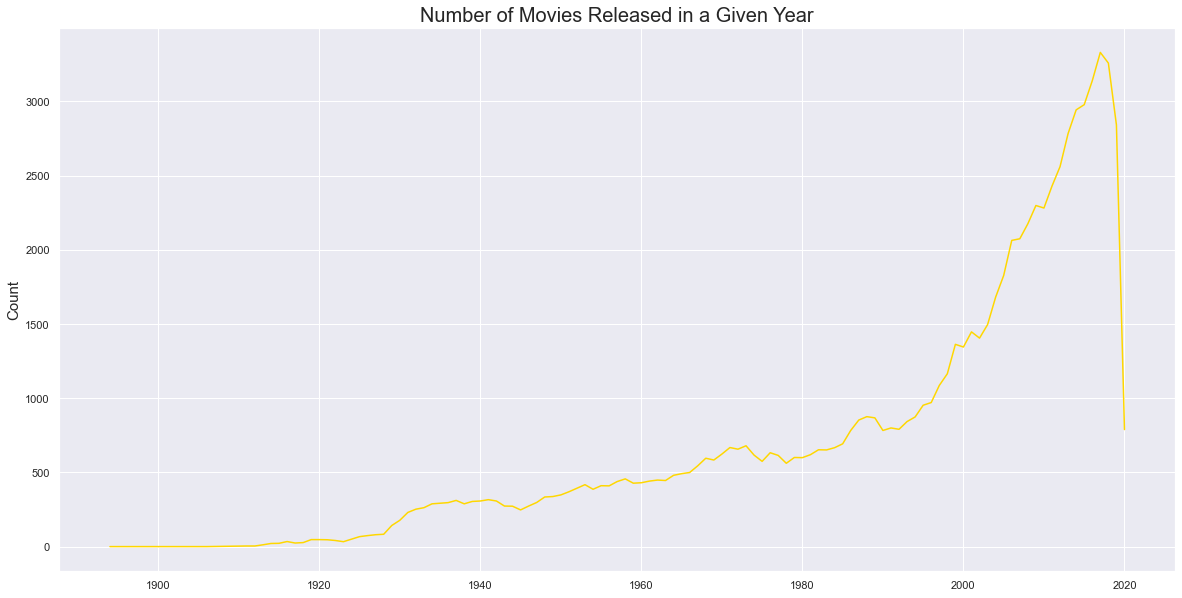

In [18]:
count_of_year = movies['year'].value_counts().reset_index(name='count').sort_values('index')
count_of_year.set_index('index', inplace=True)

#Plotting figure
plt.figure(figsize=plots['figuresize'])
plt.plot('count', data=count_of_year, color='gold')
plt.title('Number of Movies Released in a Given Year', fontdict=plots['fonttitle'])
plt.ylabel('Count', fontdict=plots['fontlabel']);
plt.savefig("../Images/Figure 6.jpg")

There seems to be a steep increase in the number of moviews released every year since 1894. We see the sharp decrease in 2020 only because the data for 2020 is incomplete.

Now although the number of movies released have been steadily increasing, there is a question as to their quality. Are these movies all liked by the public?

We can get a good idea of this by looking at the ratings of movies per year. But here we face a conundrum. We have two choices of ratings, the mean_vote column which gives us a simple arithmatic mean of the voting results and weighted_average_vote which are the ratings displayed by IMDB on their website. IMDB uses their own algorithm to determine the weights to add which they don't disclose to prevent tampering with the ratings.

Let's first see how these 2 different methods of rating compare against each other.

In [19]:
#Joining movies and rating data on imdb_title_id as index
movies_and_ratings = movies.set_index('imdb_title_id').join(ratings.set_index('imdb_title_id'))

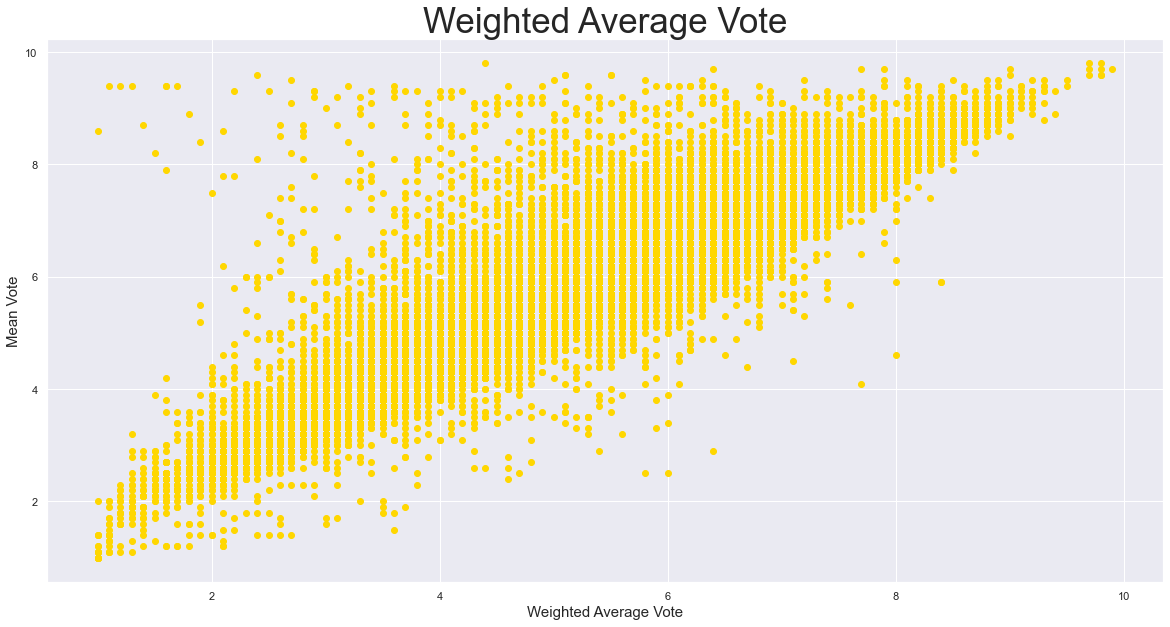

In [20]:
plt.figure(figsize=plots['figuresize'])
plt.scatter('weighted_average_vote','mean_vote', data=movies_and_ratings, color='gold')
plt.title('Weighted Average Vote', fontdict={'fontsize':35})
plt.xlabel('Weighted Average Vote', fontdict=plots['fontlabel'])
plt.ylabel('Mean Vote', fontdict=plots['fontlabel'])
plt.savefig("../Images/Figure 7.jpg")

It is quite evident from the scatter plot that movies which are given a high rating using the weighted rating can sometimes be given a low rating using the mean rating. Thus we can conclude that mean_vote is not an accurate measure for rating and we will use weighted average vote instead.

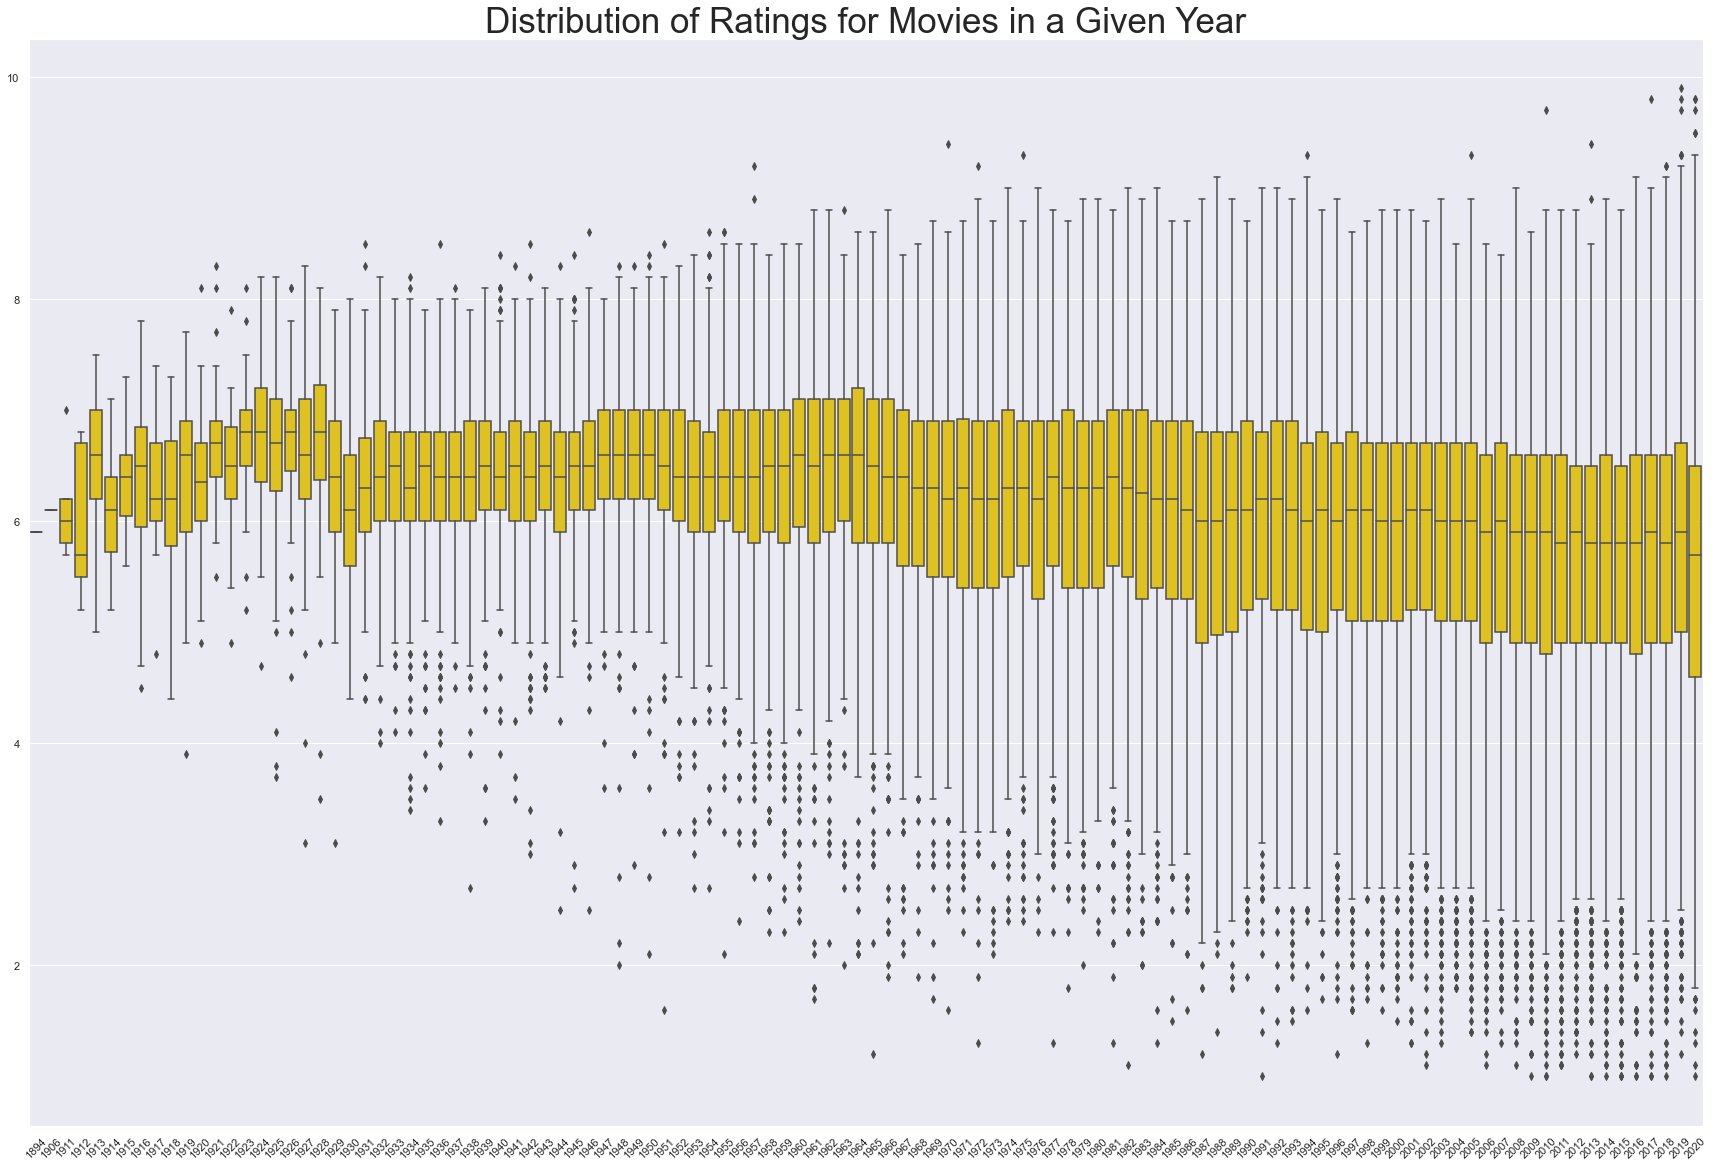

In [21]:
plt.figure(figsize=(30,20))
sns.boxplot( x=movies_and_ratings['year'], y=movies_and_ratings['weighted_average_vote'], color='gold')
plt.title('Distribution of Ratings for Movies in a Given Year',fontdict={'fontsize':35})
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45);
plt.savefig("../Images/Figure 8.jpg")

We observe that the late 1800's and early 1900's show a much higher fluctuation of the mean rating of movies in those years. This is understandably because we have much fewer votes given to movies in the early years and therefore the mean won't be as stable. Comparing the distribution seen in the latest years we can see that there is lower fluctuation of the mean but higher extremes of lower and higher end ratings.

But if we were to look closely, we can observe the mean ratings getting ever so slightly lower through time. Nowadays everyone is a sel-proclaimed "Critic" and have set higher standards of entertainment and result in giving lower ratings than one may give.

## Duration vs Average Rating

Does the duration of the film have anything to do with the rating given to it? The figure below gives us a scatter plot of the Duration of the film vs the Average Rating given to it. We observe that there are a few outliers on the upper left side of the plot where you have some viewers who rated very long lasting films and have been rated highly. But there is a clear cut off at the 200 minutes mark where most of our points lie before it.

There doesn't seem to be any clear correlation here.

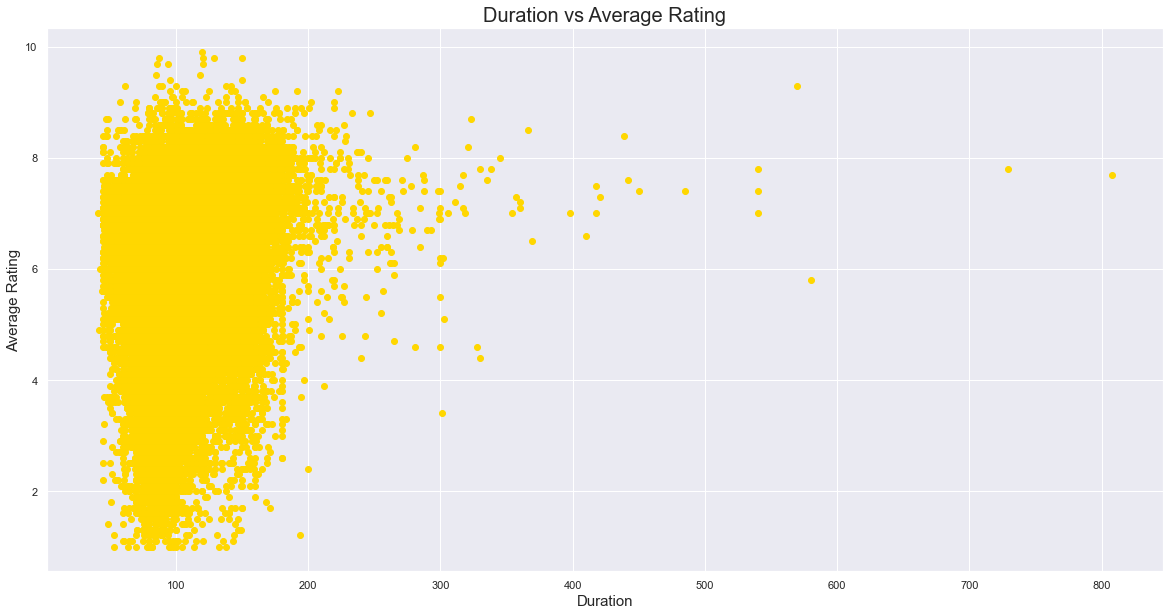

In [22]:
plt.figure(figsize=plots['figuresize'])
plt.scatter('duration','avg_vote', data=movies,color='gold')
plt.title('Duration vs Average Rating', fontdict=plots['fonttitle'])
plt.xlabel('Duration', fontdict=plots['fontlabel'])
plt.ylabel('Average Rating', fontdict=plots['fontlabel'])
plt.savefig("../Images/Figure 9.jpg")

### Number of Languages Available

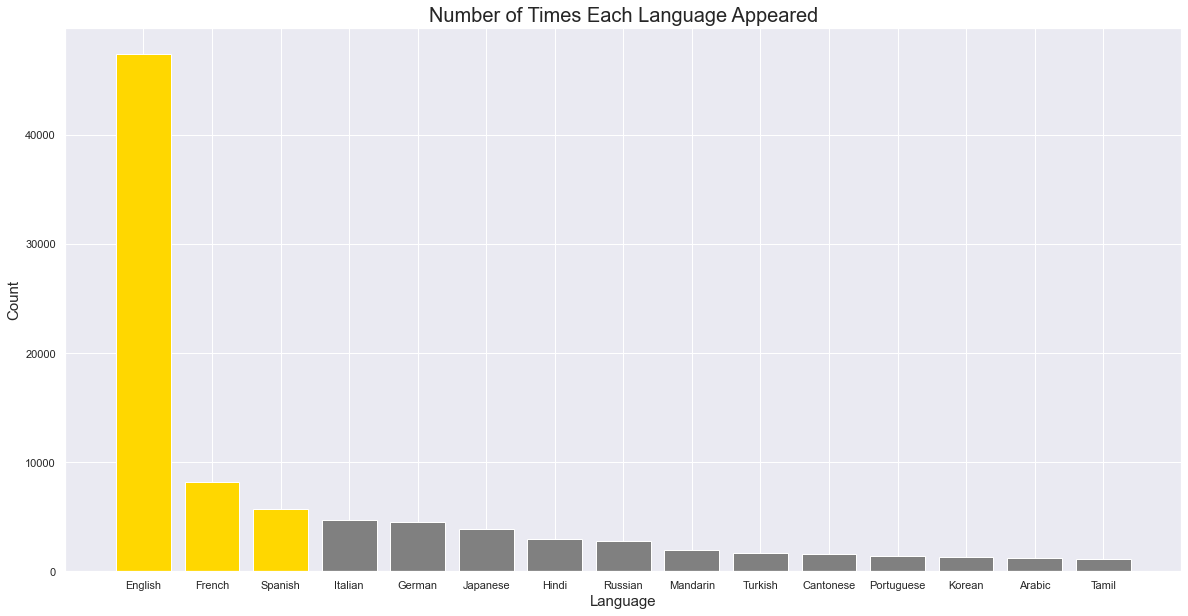

In [23]:
lang = get_count(movies_and_ratings,'language')
lang['color'] = 'grey'
lang['color'].iloc[:3] = 'gold'

plt.figure(figsize=plots['figuresize'])
plt.bar(height='count',x='language',data=lang.head(15), color='color')
plt.title('Number of Times Each Language Appeared', fontdict=plots['fonttitle'])
plt.xlabel('Language', fontdict=plots['fontlabel'])
plt.ylabel('Count', fontdict=plots['fontlabel'])
plt.savefig("../Images/Figure 10.jpg")

The number of English movies available far out-weighs any other language.

### US and Non-US Voters

In [24]:
include = movies_and_ratings.groupby('language').size().sort_values(ascending=False) >= 500
lang_df = movies_and_ratings.groupby('language').mean().loc[include].sort_values("weighted_average_vote", ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=lang_df.index, y=lang_df["us_voters_rating"], name="US Voters Rating", marker_color='gold'))
fig.add_trace(go.Bar(x=lang_df.index, y=lang_df["non_us_voters_rating"], name="Non-US Voters Rating", marker_color='grey'))
fig.update_layout(title={'text': f"Comparison of US vs Non-US Voters Rating", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
                             
fig.show()

## Production Company vs Rating

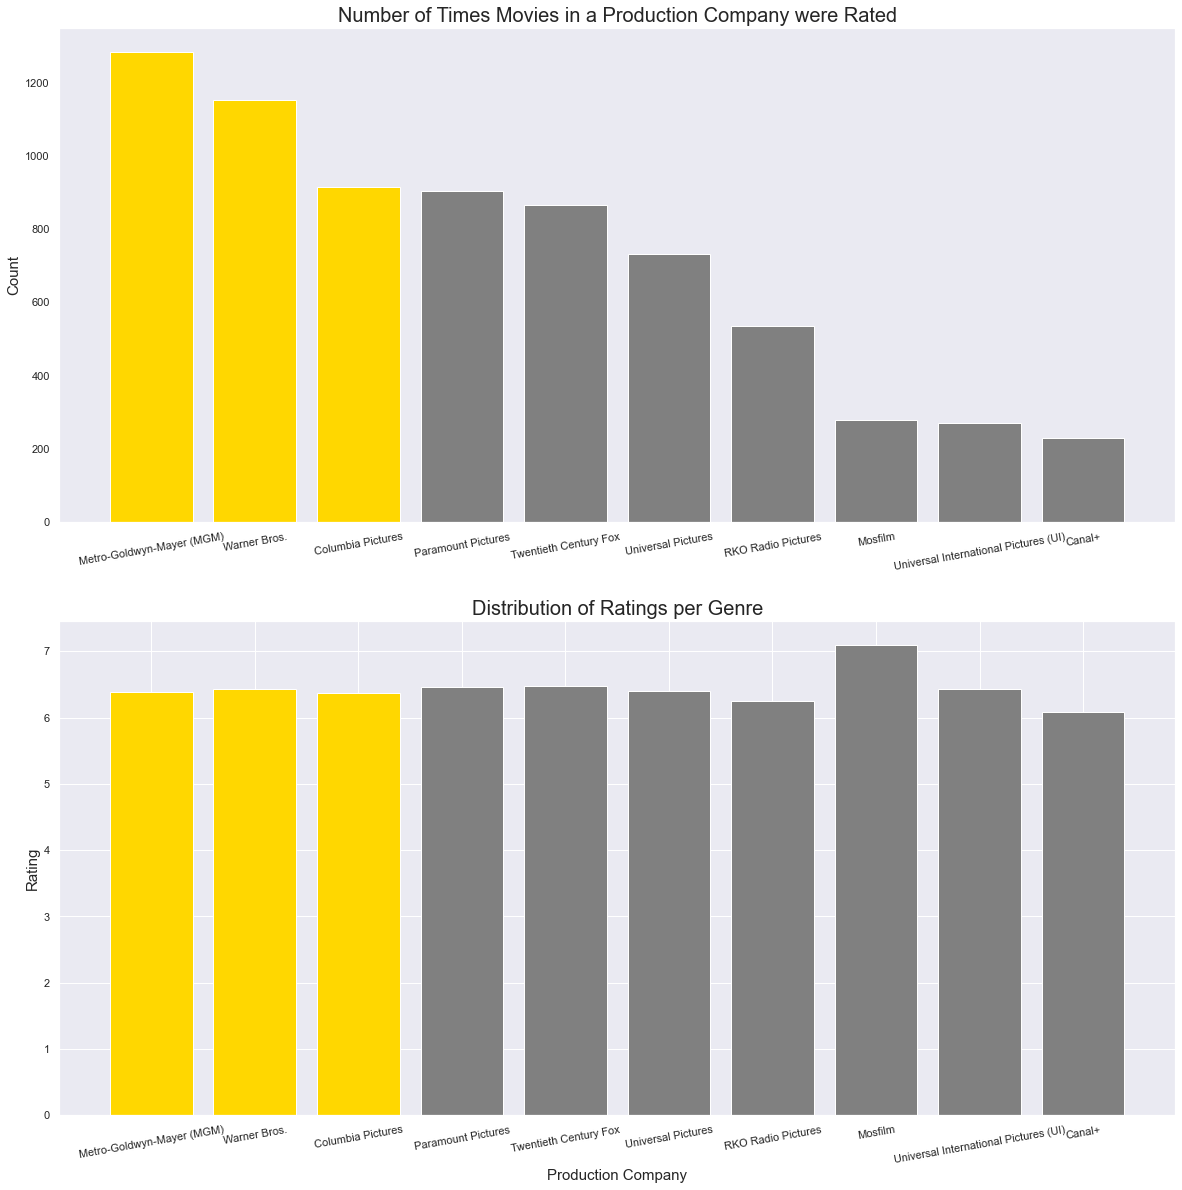

In [74]:
# Getting total number of ratings for each production compnay and taking the top 10
totalrat_prod_comp = movies['production_company'].value_counts().sort_values(ascending=False).head(10).reset_index(name='count')
totalrat_prod_comp['color'] = 'grey'
totalrat_prod_comp['color'].iloc[:3] = 'gold'

# Geting average ratings given to movies made by a certain production company
avgrat_prod_comp = movies.groupby('production_company')['avg_vote'].mean().reset_index(name='Avg Rating')
# Merging to get both columns in one dataframe
totalrat_prod_comp_merg = totalrat_prod_comp.merge(avgrat_prod_comp, left_on='index', right_on='production_company', how='left')


# # Plotting total number of ratings recieved by production company
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(2,1,1)
ax1.bar('index','count', data=totalrat_prod_comp_merg, color='color')
ax1.set_title('Number of Times Movies in a Production Company were Rated', fontdict=plots['fonttitle'])
ax1.set_ylabel('Count', fontdict=plots['fontlabel'])
ax1.set_xticklabels(totalrat_prod_comp['index'], rotation=10)
ax1.grid(False)

ax2 = plt.subplot(2,1,2)
ax2.bar( x='index', height='Avg Rating', data=totalrat_prod_comp_merg, color='color')
ax2.set_title('Distribution of Ratings per Genre', fontdict=plots['fonttitle'])
ax2.set_ylabel('Rating', fontdict=plots['fontlabel'])
ax2.set_xlabel('Production Company', fontdict=plots['fontlabel'])
ax2.set_xticklabels(totalrat_prod_comp_merg['index'], rotation=10);
#fig.savefig('Production Company vs Rating.jpg')


## Duration vs Ratings

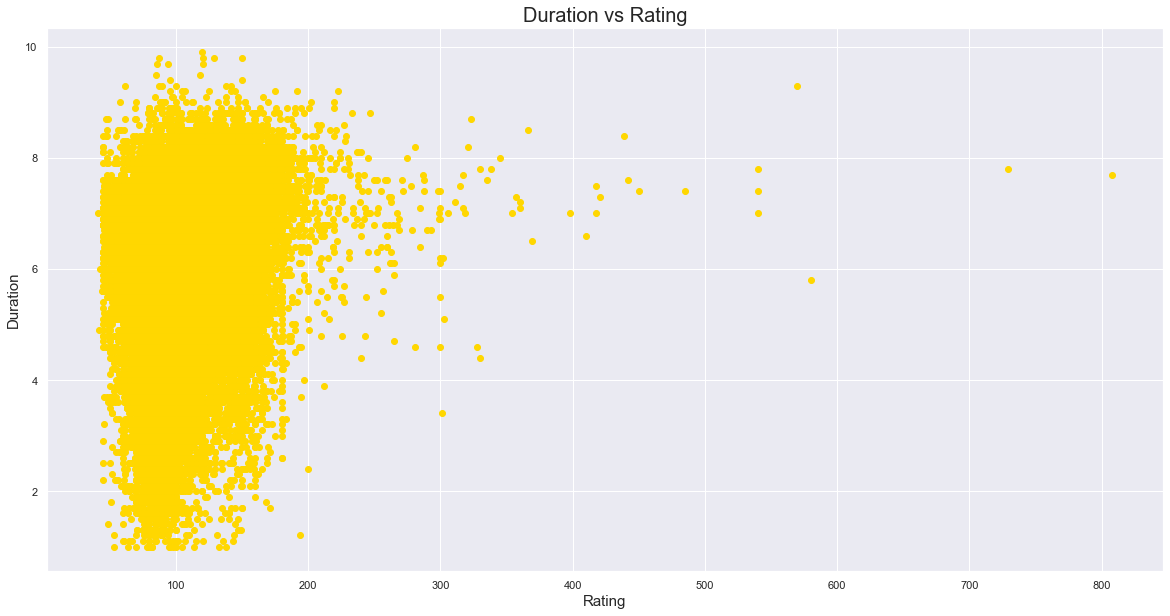

In [83]:
plt.figure(figsize=plots['figuresize'])
plt.scatter(x='duration',y='avg_vote', data=movies, color='gold')
plt.title('Duration vs Rating', fontdict=plots['fonttitle'])
plt.xlabel('Rating', fontdict=plots['fontlabel'])
plt.ylabel('Duration', fontdict=plots['fontlabel'])
plt.savefig('Duration vs Rating.jpg')

In [81]:
movies.corr()

,year,duration,avg_vote,votes
year,1.000000,0.172807,-0.217573,0.058556
duration,0.172807,1.000000,0.242430,0.125617
avg_vote,-0.217573,0.242430,1.000000,0.166969
votes,0.058556,0.125617,0.166969,1.000000


In [82]:
ratings.corr()

,weighted_average_vote,total_votes,mean_vote,median_vote,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,bin
weighted_average_vote,1.000000,0.166972,0.928293,0.876351,0.855841,0.171062,0.956308,0.171934,0.974347
total_votes,0.166972,1.000000,0.144181,0.120133,0.157187,0.968620,0.171096,0.993341,0.163301
mean_vote,0.928293,0.144181,1.000000,0.956264,0.805012,0.146518,0.848323,0.147357,0.904191
median_vote,0.876351,0.120133,0.956264,1.000000,0.755385,0.120725,0.793129,0.122625,0.847781
us_voters_rating,0.855841,0.157187,0.805012,0.755385,1.000000,0.165340,0.796488,0.160850,0.833939
us_voters_votes,0.171062,0.968620,0.146518,0.120725,0.165340,1.000000,0.174071,0.965200,0.166828
non_us_voters_rating,0.956308,0.171096,0.848323,0.793129,0.796488,0.174071,1.000000,0.177736,0.931900
non_us_voters_votes,0.171934,0.993341,0.147357,0.122625,0.160850,0.965200,0.177736,1.000000,0.168099
bin,0.974347,0.163301,0.904191,0.847781,0.833939,0.166828,0.931900,0.168099,1.000000


# Data Modelling

In [1]:
from surprise import Dataset

In [6]:
df = pd.read_csv('../Data/ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
